We use the senator voting data to separate out the data into possible clusters. 



Load data

In [256]:
url_votes = 'https://raw.githubusercontent.com/exemplary-citizen/PCA-and-Senate-Voting-Data/master/senator_pca_problem/senator_data_pca/'
senator_df =  pd.read_csv(url_votes + 'data_matrix.csv',error_bad_lines=False)
af = pd.read_csv(url_votes + 'politician_labels.txt', header=None)
af["affiliations"] = af[0].str.split().str[-1]
senators = list(senator_df)[3:]
print(senators)

[' Arlen Specter (PA)', ' Barack H. Obama (IL)', ' BarbaraA Mikulski(MD)', ' BarbaraBoxer(CA)', ' Bill Nelson(FL)', ' BlancheL.Lincoln(AR)', ' ByronL.Dorgan(ND)', ' C.SaxbyChambliss(GA)', ' CarlLevin(MI)', " CharlesE.'Chuck' Grassley(IA)", " CharlesE.'Chuck'Schumer(NY)", " CharlesT.'Chuck' Hagel(NE)", ' ChristopherJ.Dodd(CT)', " ChristopherS.'Kit'Bond(MO)", ' ConradR.Burns(MT)', ' CraigThomas(WY)', ' DanielK.Inouye(HI)', ' DanielKahikinaAkaka(HI)', ' DavidB.Vitter (LA)', ' DebbieAnnStabenow(MI)', ' DianneFeinstein(CA)', " E. Benjamin'Ben'Nelson(NE)", " EdwardM.'Ted'Kennedy(MA)", ' ElizabethH.Dole(NC)', ' EvanBayh(IN)', ' FrankR.Lautenberg(NJ)', ' GeorgeFelixAllen(VA)', ' GeorgeV.Voinovich(OH)', ' GordonHaroldSmith(OR)', ' HarryM.Reid(NV)', " HerbertH.’Herb'Kohl(WI)", ' HillaryRodhamClinton(NY)', " JamesM.'Jim'Inhofe(OK)", " JamesM.'Jim'Talent(MO)", " JamesMerrill'Jim'Jeffords(VT)", ' JeffBingaman(NM)', " JeffersonB.'Jeff'SessionsIII(AL)", ' JimBunning(KY)', ' JimW.DeMint(SC)', ' JohnCo

In [0]:
X = np.array(senator_df.values[:, 3:].T, dtype='float64') #transpose to get senators as rows

Red is labeled as 1 and Blue as 0

In [258]:
typical_row = X[0,:]
affiliations = af["affiliations"]
def convertLabel(label):
  if label == 'Red':
    return 1
  else:
    return 0
new_af = list(map(convertLabel, affiliations))
print(new_af)

[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1]


In [259]:
from sklearn.cluster import KMeans
kmeans = KMeans(2)
classifier = kmeans.fit(X)
labels = classifier.labels_
print(labels.tolist())

[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1]


Centers of the Clusters marked in red


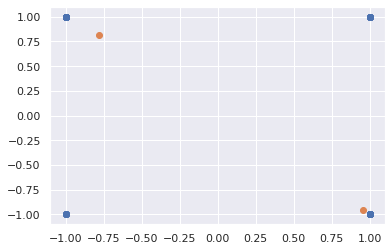

 E. Benjamin'Ben'Nelson(NE) was mispredicted as Red
 Lincoln D. Chafee(RI) was mispredicted as Blue


In [278]:
# Visual of the centers and the data

print("Centers of the Clusters marked in red")
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])
plt.show()

y_true = new_af
y_pred = labels.tolist()
mispredictions = np.array(y_true) - labels

cluster_centers = classifier.cluster_centers_;
for i, label in enumerate(mispredictions):
  if label == 1 or label == -1:
    color = "Red" if labels[i]==1 else "Blue"
    print(senators[i] +" was mispredicted as " + color)

The mispredictions were because the centers of the clusters were at a closer euclidean distance from these data points and thus they were misclassified.